http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html 

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import csv

article_dict = {}
i = 0
list_of_data_num = []

for j in range(0,22):
    if j < 10:
        list_of_data_num.append("00" + str(j))
    else:
        list_of_data_num.append("0" + str(j))

# loop all the articles to extract date, title and article body
for num in list_of_data_num:
    try:
        soup = BeautifulSoup(open("reut2-" + num + ".sgm"), features='lxml')
    except:
        continue
    print(num)
    data_reuters = soup.find_all('reuters')
    for data in data_reuters:
        article_dict[i] = {}
        for date in data.find_all('date'):
            try:
                article_dict[i]["date"] = str(date.contents[0]).strip()
            except:
                article_dict[i]["date"] = None
            # print(date.contents[0])
        for title in data.find_all('title'):
            article_dict[i]["title"] = str(title.contents[0]).strip()
            # print(title.contents)
        for text in data.find_all('text'):
            try:
                article_dict[i]["text"] = str(text.contents[4]).strip()
            except:
                article_dict[i]["text"] = None
        i += 1


dataframe_article = pd.DataFrame(article_dict).T
dataframe_article.to_csv('articles_data.csv', header=True, index=False, quoting=csv.QUOTE_ALL)
print(dataframe_article)

In [ ]:
dataframe_article.head()

In [ ]:
dataframe_article.info()

In [1]:
import pandas as pd 
import re
import string

articles_data = pd.read_csv('articles_data.csv') 

print(articles_data.apply(lambda x: sum(x.isnull()))) 

articles_nonNull = articles_data.dropna(subset=['text']) 

articles_nonNull.reset_index(inplace=True)

date        0
title     737
text     3410
dtype: int64


In [2]:
articles_nonNull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18168 entries, 0 to 18167
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   18168 non-null  int64 
 1   date    18168 non-null  object
 2   title   18168 non-null  object
 3   text    18168 non-null  object
dtypes: int64(1), object(3)
memory usage: 567.9+ KB


In [3]:
def clean_text(text):
    """Make text lowercase, 
       remove text in angle brackets,
       remove \n,
       remove punctuation and 
       remove words containing numbers."""
    # lower case
    text = str(text).lower() 
    
    # remove text in angle brackets
    text = re.sub('<.*?>+', '', text).strip()
    
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).strip()
    
    #remove newline character
    text = re.sub('\n', ' ', text).strip()
    
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text).strip()
    
    return text

In [4]:
articles_nonNull.head()

,index,date,title,text
0,0,26-FEB-1987 15:01:01.79,BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...
1,1,26-FEB-1987 15:02:20.00,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT,Standard Oil Co and BP North America\nInc said...
2,2,26-FEB-1987 15:03:27.51,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,Texas Commerce Bancshares Inc's Texas\nCommerc...
3,4,26-FEB-1987 15:10:44.60,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...
4,5,26-FEB-1987 15:14:36.41,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show\ncrop regis...


In [5]:
articles_nonNull['text_clean']=articles_nonNull['text'].apply(lambda x:clean_text(x))

<ipython-input-5-997fe0c30539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_nonNull['text_clean']=articles_nonNull['text'].apply(lambda x:clean_text(x))


In [6]:
articles_nonNull.head()

,index,date,title,text,text_clean
0,0,26-FEB-1987 15:01:01.79,BAHIA COCOA REVIEW,Showers continued throughout the week in\nthe ...,showers continued throughout the week in the b...
1,1,26-FEB-1987 15:02:20.00,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT,Standard Oil Co and BP North America\nInc said...,standard oil co and bp north america inc said ...
2,2,26-FEB-1987 15:03:27.51,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,Texas Commerce Bancshares Inc's Texas\nCommerc...,texas commerce bancshares incs texas commerce ...
3,4,26-FEB-1987 15:10:44.60,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department\nreported the ...,the us agriculture department reported the far...
4,5,26-FEB-1987 15:14:36.41,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show\ncrop regis...,argentine grain board figures show crop regist...


In [7]:
articles_nonNull['word_length'] = articles_nonNull['text'].apply(lambda x: len(str(x).split())) 

print(articles_nonNull.describe())

              index   word_length
count  18168.000000  18168.000000
mean   10596.587682    115.091039
std     6246.814454     96.964837
min        0.000000      1.000000
25%     5173.750000     54.000000
50%    10428.500000     86.000000
75%    16170.500000    148.000000
max    21577.000000   1668.000000


<ipython-input-7-cca7bc0f513b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_nonNull['word_length'] = articles_nonNull['text'].apply(lambda x: len(str(x).split()))


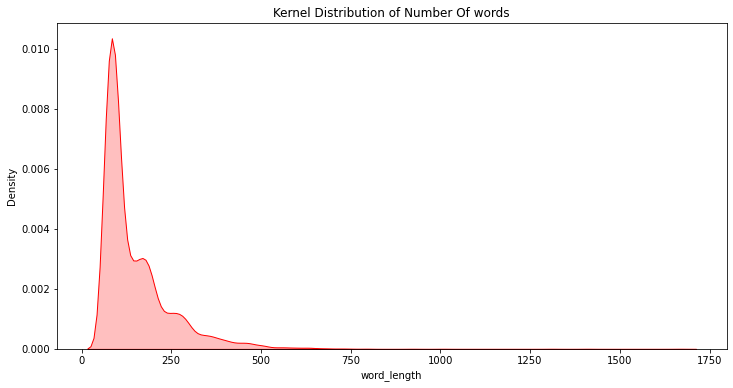

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

articles_word_limit = articles_nonNull[articles_nonNull['word_length'] > 60]

plt.figure(figsize=(12,6)) 

p1=sns.kdeplot(articles_word_limit['word_length'], shade=True, color='r').set_title("Kernel Distribution of Number Of words")

In [9]:
articles_word_limit.describe()

,index,word_length
count,12800.000000,12800.000000
mean,10509.023203,147.451719
std,6192.369550,98.578027
min,0.000000,61.000000
25%,5117.750000,83.000000
50%,10326.500000,105.000000
75%,16073.250000,182.000000
max,21577.000000,1668.000000


In [10]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create stopword list
    stopword_list = list(STOPWORDS) + ['QTR','mln','mln dlr','dlr','dlrs'] 

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()

In [11]:
low_len_articles=articles_nonNull[articles_nonNull['word_length'] < 60]
low_len_articles.head()

,index,date,title,text,text_clean,word_length
2,2,26-FEB-1987 15:03:27.51,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,Texas Commerce Bancshares Inc's Texas\nCommerc...,texas commerce bancshares incs texas commerce ...,52
7,8,26-FEB-1987 15:17:11.20,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its\nboard of direc...,champion products inc said its board of direct...,58
9,10,26-FEB-1987 15:18:59.34,COBANCO INC <CBCO> YEAR NET,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...",shr cts vs dlrs net vs assets mln...,51
12,13,26-FEB-1987 15:20:27.17,BROWN-FORMAN INC <BFD> 4TH QTR NET,Shr one dlr vs 73 cts\n Net 12.6 mln vs 15....,shr one dlr vs cts net mln vs mln r...,39
14,16,26-FEB-1987 15:24:48.56,NATIONAL HEALTH ENHANCEMENT <NHES> NEW PROGRAM,National Health Enhancement\nSystems Inc said ...,national health enhancement systems inc said i...,58


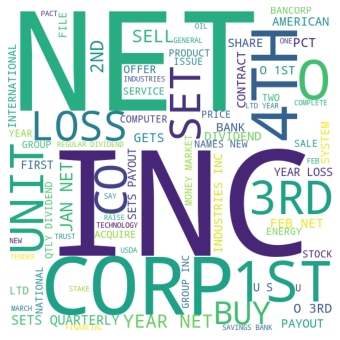

In [12]:
paragraph=' '.join(low_len_articles.title.tolist())
word_cloud(paragraph)

Reuters articles that contain fact or stock information have fewer words.

## Wordcloud with different shapes

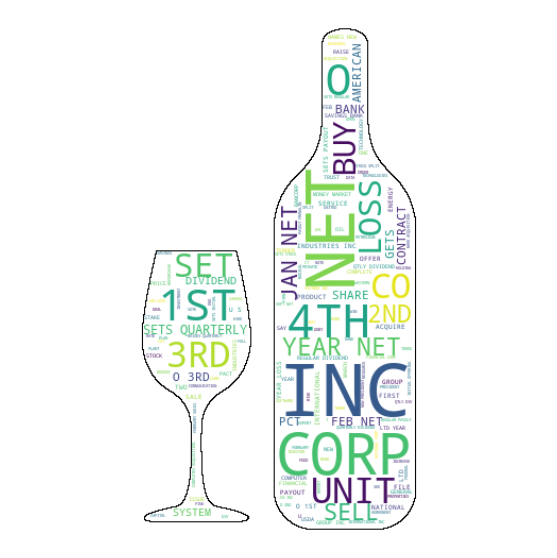

In [13]:
import numpy as np
from PIL import Image

stopword_list = list(STOPWORDS) + ['QTR','mln','mln dlr','dlr','dlrs'] 

wine_mask = np.array(Image.open("wine_mask.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

    
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))


# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopword_list, contour_width=1, contour_color='black')

# Generate a wordcloud
wc.generate(paragraph)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud for all the articles

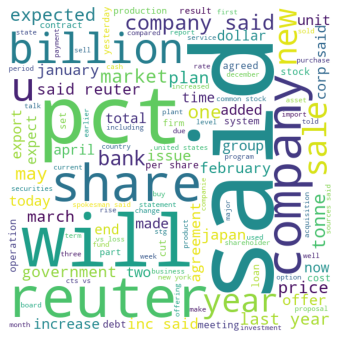

In [14]:
paragraph=' '.join(articles_word_limit.text_clean.tolist())
word_cloud(paragraph)

## Top N Unigram 

In [35]:
!pip install gensim

<ipython-input-36-892034822a9d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_word_limit['temp_list'] = articles_word_limit['text_clean'].apply(lambda x:str(x).split())
<ipython-input-36-892034822a9d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_word_limit['temp_list_stopw'] = articles_word_limit['temp_list'].apply(lambda x:remove_stopword(x))


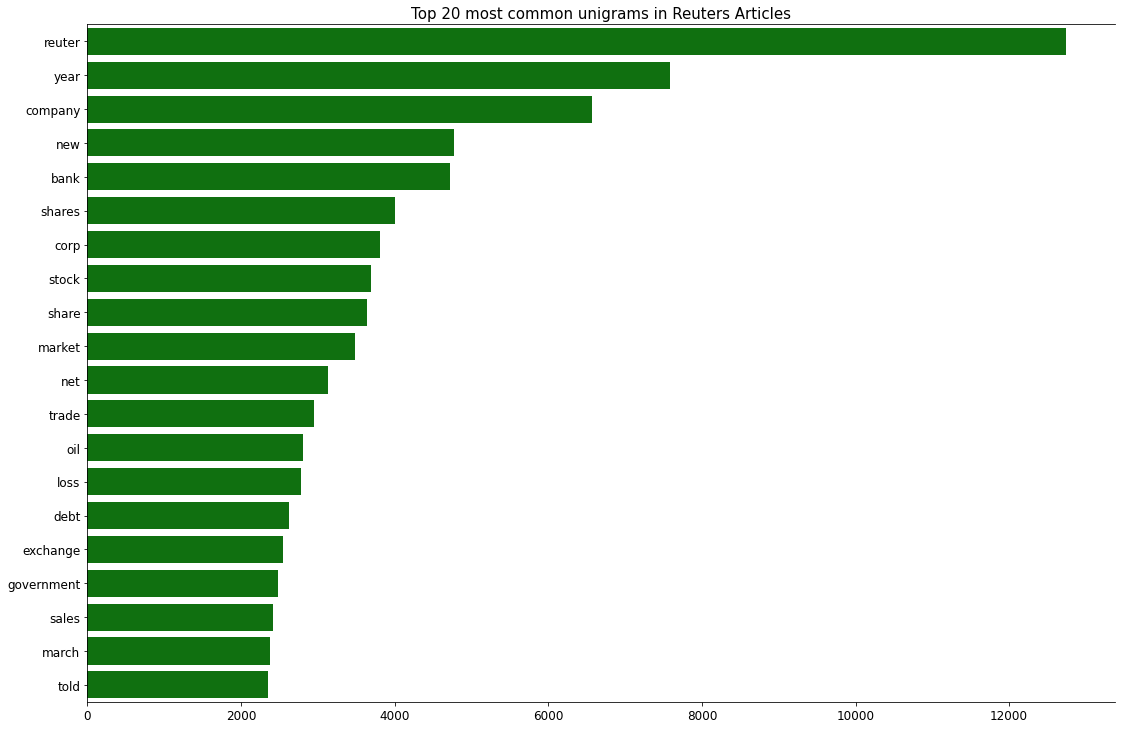

In [36]:
from gensim.parsing.preprocessing import remove_stopwords  
import gensim
from wordcloud import WordCloud
import numpy as np  
import random         

# import stopwords from gensim methods to stop_list variable
# You can also manually add stopwords
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS 

stopwords_list = list(set(gensim_stopwords))   

stopwords_update = ["mln", "vs","cts","said","billion","pct","dlrs","dlr"]

stopwords = stopwords_list + stopwords_update

articles_word_limit['temp_list'] = articles_word_limit['text_clean'].apply(lambda x:str(x).split())

# Remove stopwords from the articles
def remove_stopword(x):
    return [word for word in x if word not in stopwords]

articles_word_limit['temp_list_stopw'] = articles_word_limit['temp_list'].apply(lambda x:remove_stopword(x))

from collections import defaultdict

# generate n-gram words
def generate_ngrams(text, n_gram=1):
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]
  
article_unigrams = defaultdict(int)

for tweet in articles_word_limit['temp_list_stopw']:
    for word in generate_ngrams(tweet):
        article_unigrams[word] += 1
        
article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])

N=20

# bar graph Plot of top 20 common unigram in reuters articles
fig, axes = plt.subplots(figsize=(15,10))

plt.tight_layout()

sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='green')

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title(f'Top {N} most common unigrams in Reuters Articles', fontsize=15)
plt.show()

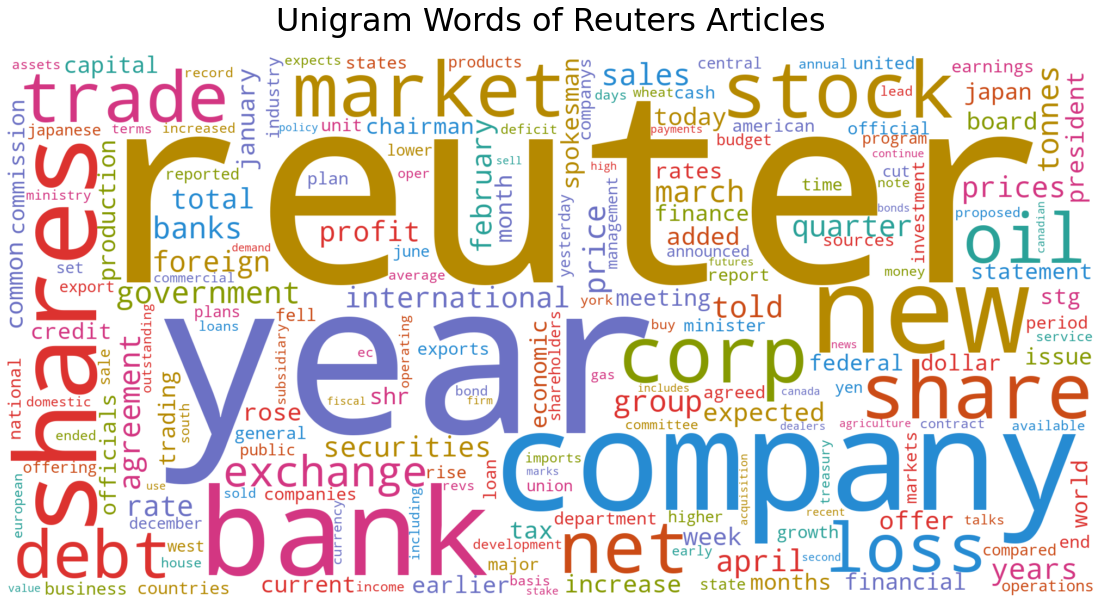

In [38]:
# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)
fd = {
    'fontsize': '32',
    'fontweight' : 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1, 8)) .generate_from_frequencies(article_unigrams)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.set_title("Unigram Words of Reuters Articles", pad=24, fontdict=fd)
plt.show()

## Functions

In [32]:
import gensim
from wordcloud import WordCloud
import numpy as np  
import random         
from collections import defaultdict

def remove_stopword(x):
    """Remove stopwords from the articles"""
    # import stopwords from gensim methods to stop_list variable
    gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS 

    stopwords_list = list(set(gensim_stopwords))   

    stopwords_update = ["mln", "vs","cts","said","billion","pct","dlrs","dlr"]

    stopwords = stopwords_list + stopwords_update
    
    return [word for word in x if word not in stopwords]


def generate_ngrams(text, n_gram=1):
    """Generate n-gram words"""
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def top_n_grams(articles_word_limit,N=20,n_gram=1):
    articles_word_limit['temp_list'] = articles_word_limit['text_clean'].apply(lambda x:str(x).split())

    articles_word_limit['temp_list_stopw'] = articles_word_limit['temp_list'].apply(lambda x:remove_stopword(x))

    article_unigrams = defaultdict(int)

    for tweet in articles_word_limit['temp_list_stopw']:
        for word in generate_ngrams(tweet,n_gram):
            article_unigrams[word] += 1


    article_unigrams_df = pd.DataFrame(sorted(article_unigrams.items(), key=lambda x: x[1])[::-1])

    

    # bar graph Plot of top 20 common unigram in reuters articles
    fig, axes = plt.subplots(figsize=(12,8))

    plt.tight_layout()

    sns.barplot(y=article_unigrams_df[0].values[:N], x=article_unigrams_df[1].values[:N], color='green')

    axes.spines['right'].set_visible(False)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.tick_params(axis='x', labelsize=12)
    axes.tick_params(axis='y', labelsize=12)
    axes.set_title(f'Top {N} most common {n_gram}-grams in Reuters Articles', fontsize=15)
    plt.show()
    return article_unigrams
    
# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)

def word_cloud_latest(article_unigrams,ngram):
    fd = {
        'fontsize': '32',
        'fontweight' : 'normal',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center',
    }

    wc = WordCloud(width=2000, height=1000, collocations=False,
                   background_color="white",
                   color_func=col_func,
                   max_words=200,
                   random_state=np.random.randint(1, 8)).generate_from_frequencies(article_unigrams)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(str(ngram)+'-gram Words of Reuters Articles', pad=24, fontdict=fd)
    plt.show()

<ipython-input-32-5d9038da4830>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_word_limit['temp_list'] = articles_word_limit['text_clean'].apply(lambda x:str(x).split())
<ipython-input-32-5d9038da4830>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_word_limit['temp_list_stopw'] = articles_word_limit['temp_list'].apply(lambda x:remove_stopword(x))


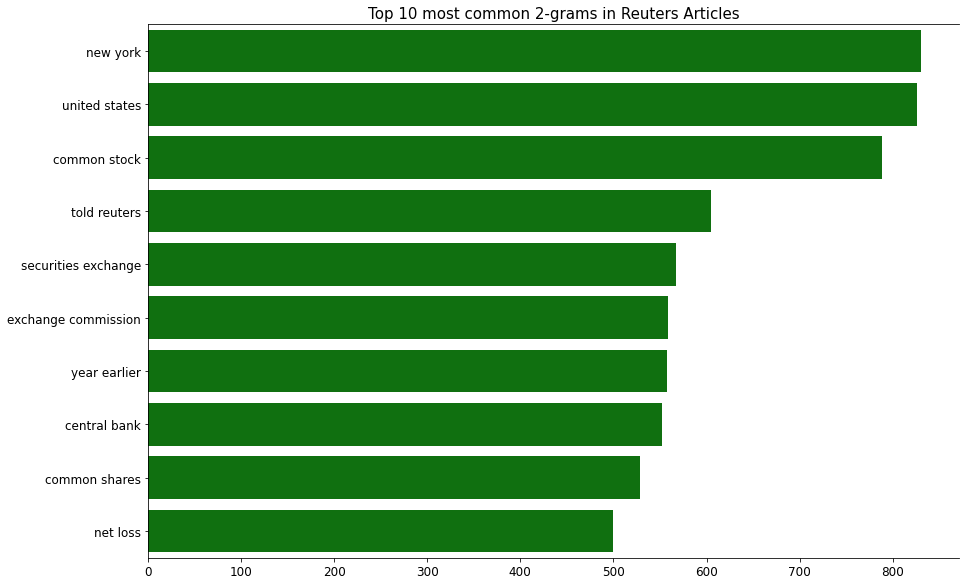

In [33]:
ngram=2
article_ngrams=top_n_grams(articles_word_limit,10,ngram)

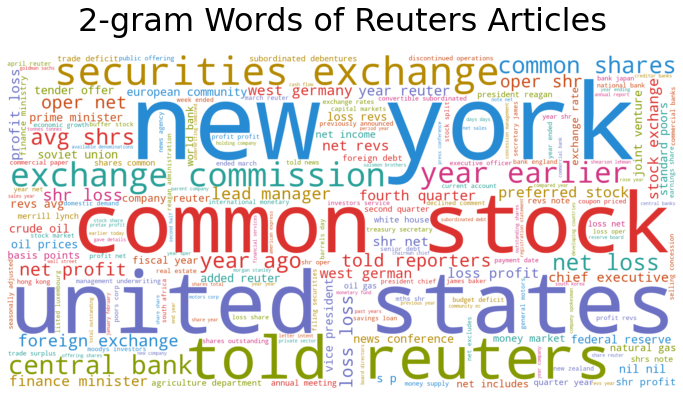

In [34]:
word_cloud_latest(article_ngrams,ngram)

## Entity Recognition

In [ ]:
import spacy
from matplotlib import cm
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')
ner_collection = {"Location":[],"Person":[],"Date":[],"Quantity":[],"Organisation":[]}

location = []
person = []
date = []
quantity = []
organisation = []

def ner_text(text):
    doc = nlp(text)
    ner_collection = {"Location":[],"Person":[],"Date":[],"Quantity":[],"Organisation":[]}
    for ent in doc.ents:
        if str(ent.label_) == "GPE":
            ner_collection['Location'].append(ent.text)
            location.append(ent.text)
        elif str(ent.label_) == "DATE":
            ner_collection['Date'].append(ent.text)
            person.append(ent.text)
        elif str(ent.label_) == "PERSON":
            ner_collection['Person'].append(ent.text)
            date.append(ent.text)
        elif str(ent.label_) == "ORG":
            ner_collection['Organisation'].append(ent.text)
            quantity.append(ent.text)
        elif str(ent.label_) == "QUANTITY":
            ner_collection['Quantity'].append(ent.text)
            organisation.append(ent.text)
        else:
            continue
    return ner_collection

articles_word_limit['ner_data'] = articles_word_limit['text'].map(lambda x: ner_text(x))

In [ ]:
article_bigrams = defaultdict(int)
for tweet in articles_word_limit['temp_list_stopw']:
    for word in generate_ngrams(tweet, n_gram=2):
        article_bigrams[word] += 1
df_article_bigrams=pd.DataFrame(sorted(article_bigrams.items(),
                                key=lambda x: x[1])[::-1])
N=20
# bar graph of top 50 bigram words
fig, axes = plt.subplots(figsize=(15,10), dpi=100)
plt.tight_layout()
sns.barplot(y=df_article_bigrams[0].values[:N],
            x=df_article_bigrams[1].values[:N], 
            color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel("")
axes.set_ylabel("")
axes.tick_params(axis="x", labelsize=13)
axes.tick_params(axis="y", labelsize=13)
axes.set_title(f"Top {N} most common Bigrams in Reuters Articles",
               fontsize=15)
plt.show()

In [ ]:
#Word cloud
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1,8))\
               .generate_from_frequencies(article_bigrams)
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wc, interpolation="bilinear")
ax.axis("off")
ax.set_title("Bigram Words of Reuters Articles", pad=24,
             fontdict=fd)
plt.show()

In [ ]:
article_bigrams = defaultdict(int)
for tweet in articles_word_limit['temp_list_stopw']:
    for word in generate_ngrams(tweet, n_gram=3):
        article_bigrams[word] += 1
df_article_bigrams=pd.DataFrame(sorted(article_bigrams.items(),
                                key=lambda x: x[1])[::-1])
N=20
# bar graph of top 50 bigram words
fig, axes = plt.subplots(figsize=(15,10), dpi=100)
plt.tight_layout()
sns.barplot(y=df_article_bigrams[0].values[:N],
            x=df_article_bigrams[1].values[:N], 
            color='red')
axes.spines['right'].set_visible(False)
axes.set_xlabel("")
axes.set_ylabel("")
axes.tick_params(axis="x", labelsize=13)
axes.tick_params(axis="y", labelsize=13)
axes.set_title(f"Top {N} most common Trigrams in Reuters Articles",
               fontsize=15)
plt.show()

In [ ]:
#Word cloud
wc = WordCloud(width=2000, height=1000, collocations=False,
               background_color="white",
               color_func=col_func,
               max_words=200,
               random_state=np.random.randint(1,8))\
               .generate_from_frequencies(article_bigrams)
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wc, interpolation="bilinear")
ax.axis("off")
ax.set_title("Trigram Words of Reuters Articles", pad=24,
             fontdict=fd)
plt.show()

In [ ]:
from collections import Counter
location_counts=Counter(location)

In [ ]:
location_name = []
location_count = []
for i in location_counts.most_common()[:10]:
    location_name.append(i[0].upper())
    location_count.append(i[1])


fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
ax.barh(location_name, location_count, alpha=0.7,
         # width = 0.5,
        color=cm.Blues([i / 0.00525 for i in [ 0.00208, 0.00235, 0.00281, 0.00317, 0.00362,
                                              0.00371, 0.00525, 0.00679, 0.00761, 0.00833]])
        )
plt.rcParams.update({'font.size': 10})
rects = ax.patches
for i, label in enumerate(location_count):
    ax.text(label+100 , i, str(label), size=10, ha='center', va='center')
    
ax.text(0, 1.02, 'Count of Location name Extracted from Reuters Articles', 
        transform=ax.transAxes, size=12, weight=600, color='#777777')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', colors='black', labelsize=12)
ax.set_axisbelow(True)
ax.text(0, 1.08, 'TOP 10 Location Mention in Reuters Articles',
        transform=ax.transAxes, size=22, weight=600, ha='left')

ax.text(0, -0.1, 'Source: http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html',
        transform=ax.transAxes, size=12, weight=600, color='#777777')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(axis='y',which='both', left=False, top=False, labelbottom=False)
ax.set_xticks([])
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(articles_word_limit['text_clean'])
tfidf = tfidf_vectorizer_vectors.todense()
tfidf[tfidf == 0] = np.nan
#Use nanmean of numpy which will ignore nan while calculating mean
means = np.nanmean(tfidf, axis=0)

# convert it into a dictionary for later lookup
means_words = dict(zip(tfidf_vectorizer.get_feature_names(),
                       means.tolist()[0]))
unique_words=sorted(means_words.items(),
                    key=lambda x: x[1],
                    reverse=True)
print(unique_words)